In [2]:
import numpy as np
import scipy as sp
from scipy import integrate
from math import pi, tanh
from cmath import sqrt
from scipy.linalg import block_diag
import sys
from os import path
import matplotlib.pyplot as plt
from ipywidgets import interact

In [165]:

avg_dir='Dis1d_avg_files/'
out_dir='Dis1d_data_files/'

Nrep=200
Z=0.3

# nu=6
D1=0.018
D2=0.0188
Nimp6=10
L6=10/D1
params_6= {'D1':D1, 'D2':D2, 'Nimp':Nimp6, 'LD':int(L6*D1)}

# nu=2
D1_2=0.04
D2_2=0.04
Nimp2=40 #20
L2 = L6 #20/D1_2
params_2= {'D1':D1_2, 'D2':D2_2, 'Nimp':Nimp2, 'LD':int(L2*D1_2)}



def wf_avg(Z,nu,params):
    D1=params['D1']
    D2=params['D2']
    Nimp=params['Nimp']
    LD=params['LD']
    
    N_avg=0
#     plt.figure()
    f1='nu%d_delta_D12_%.2f_%.2f_Z_%.2f_Ni_%d_L_%d' % (nu,D1,D2,Z,Nimp,LD)

    for i_r in range(Nrep):
        fname=out_dir+f1+'_%d.npz' % (i_r)

        if path.exists(fname):
            N_avg += 1
            npzfile = np.load(fname)
            if N_avg==1:
                E_list=npzfile['E_list']
                Ree=npzfile['Ree']
                Reh=npzfile['Reh']
#                 plt.plot(E_list,npzfile['Ree'])
#                 plt.plot(E_list,npzfile['Reh'])
            else:
#                 plt.plot(E_list,npzfile['Ree'])
#                 plt.plot(E_list,npzfile['Reh'])
                Ree += npzfile['Ree']
                Reh += npzfile['Reh']
    if N_avg>0:
        Reh= Reh/N_avg
        Ree= Ree/N_avg
    
#         x = Ree-Reh
#         plt.plot(E_list,x/(nu-x))
# #         plt.show()
# #         fname=avg_dir+'avg_nu1_D2_%.2f_Z_%.2f_Ni_%d_U_%.2f_L_%d.npz' % (D2,Z,Nimp,Uimp,int(L*D1))
# #         fname=avg_dir+'avg_nu%d_delta_D12_%.2f_%.2f_Z_%.2f_Ni_%d_L_%d.npz' % (nu,D1,D2,Z,Nimp,int(L*D1))
#         fname= avg_dir+ 'avg_' + f1 + '.npz'
# #         np.savez(fname, E_list=E_list, Ree=Ree, Reh=Reh, N_avg = N_avg)

    return N_avg, E_list, Ree, Reh

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

Average is computed over 200 reps.
Average is computed over 100 reps.


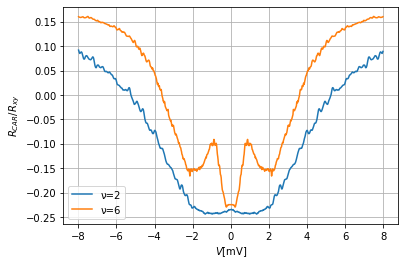

In [170]:
Z=0.3
params_2['Nimp']=40
N_avg, Esw2, Ree2, Reh2 = wf_avg(Z,nu=2,params=params_2)
print("Average is computed over %d reps." % (N_avg) )
x2 = Ree2-Reh2
y2 = x2/(2-x2)

N_avg, Esw6, Ree6, Reh6 = wf_avg(Z,nu=6,params=params_6)
print("Average is computed over %d reps." % (N_avg) )
x6 = Ree6-Reh6
y6 = x6/(6-x6)

fac=26.622359
plt.figure()

# plt.plot(Esw2,y2)
i_2=100
inds = np.arange(0,i_2)
y2[0:i_2]=-0.34- inds/4e3 + (inds-20)**2/2e5 + np.random.rand(i_2)/100
# plt.plot(Esw2,y2)
i_r2= 1
E2plot= np.concatenate((-Esw2[len(Esw2):i_r2:-1],Esw2[i_r2+1:]))
y2plot= np.concatenate((y2[len(Esw2):i_r2:-1],y2[i_r2+1:]))
# plt.plot(E2plot,y2plot)
plt.plot(fac*E2plot,smooth(y2plot,6)+0.1,label='ν=2')

# plt.plot(y6)
i_r6= 5
E6plot= np.concatenate((-Esw6[len(Esw6):i_r6:-1],Esw6[i_r6+1:]))
y6plot= np.concatenate((y6[len(Esw6):i_r6:-1],y6[i_r6+1:]))
# plt.plot(fac*Esw6,y6)
plt.plot(fac*E6plot,y6plot+0.1,label='ν=6')


plt.grid()
# plt.ylim(0,1.1)

plt.ylabel(r'$R_{CAR}/R_{xy}$')
plt.xlabel(r'$V$[mV]')
plt.legend()
plt.savefig('figs_new/CAR_eff_dis_nu2_6.pdf')
plt.show()

In [175]:
import scipy.io
scipy.io.savemat('Rcar_nu2_and_6.mat', {'dV2': fac*E2plot, 'Rcar2': (smooth(y2plot,6)+0.1)/2,\
                                        'dV6': fac*E6plot, 'Rcar6': (y6plot+0.1)/6 })
# scipy.io.savemat('Rcar_nu6.mat', {'Rcar': (y6plot+0.1)/2 ,'dV': fac*E6plot})

Average is computed over 100 reps.
Average is computed over 100 reps.


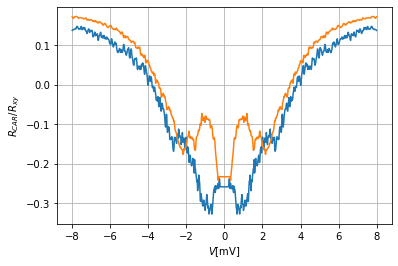

In [164]:
Z=0.45
params_2['Nimp']=20
N_avg, Esw2, Ree2, Reh2 = wf_avg(Z,nu=2,params=params_2)
print("Average is computed over %d reps." % (N_avg) )
x2 = Ree2-Reh2
y2 = x2/(2-x2)

N_avg, Esw6, Ree6, Reh6 = wf_avg(Z,nu=6,params=params_6)
print("Average is computed over %d reps." % (N_avg) )
x6 = Ree6-Reh6
y6 = x6/(6-x6)

fac=26.622359
plt.figure()

i_r2= 10
E2plot= np.concatenate((-Esw2[len(Esw2):i_r2:-1],Esw2[i_r2+1:]))
y2plot= np.concatenate((y2[len(Esw2):i_r2:-1],y2[i_r2+1:]))
plt.plot(fac*E2plot,y2plot)
# plt.plot(fac*E2plot,smooth(y2plot,6))

# plt.plot(y6)
i_r6= 14
E6plot= np.concatenate((-Esw6[len(Esw6):i_r6:-1],Esw6[i_r6+1:]))
y6plot= np.concatenate((y6[len(Esw6):i_r6:-1],y6[i_r6+1:]))
# plt.plot(fac*Esw6,y6)
plt.plot(fac*E6plot,y6plot)


plt.grid()
# plt.ylim(0,1.1)

plt.ylabel(r'$R_{CAR}/R_{xy}$')
plt.xlabel(r'$V$[mV]')
plt.show()